# Ejercicios de repaso de Pandas

En este notebook vamos a repasar algunos conceptos de Pandas. Este notebook está vacío, pero viene acompanhado de otro notebook con todas las soluciones.

**Es extremadamente importante evitar consultar las soluciones hasta que no hayas terminado los ejercicios en este notebook**. Las soluciones pueden parecer sencillas cuando las ves, pero sacarlas por uno mismo puede ser mucho más difícil. **Por favor, solo consulta las soluciones si no puedes avanzar después de varios intentos**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

%matplotlib inline

## Datos

Los datos se encuentran en el directorio `data`. Se trata de un fichero CSV, usando comas como separador, y con los nombres de las columnas en la primera fila.

*Puedes intentar usar la shell antes para comprobar cómo es el fichero*.

**Ejercicio:** Usa la shell antes de cargar el CSV para comprobar cómo de grande es. **Es posible cargar todo el fichero en memoria?**

In [2]:
!pwd

/home/dsc/Downloads


In [9]:
!ls -lh

total 1,2G
-rw-r--r-- 1 dsc dsc  54K nov 17 13:55 02-loading_and_saving_data.empty.ipynb
-rw-r--r-- 1 dsc dsc 199K nov 23 21:53 05-visualization_introduction.empty.ipynb
-rw-r--r-- 1 dsc dsc 143K nov 25 22:27 06-intro_to_pandas_practical.empty.ipynb
-rw-r--r-- 1 dsc dsc  14K nov 25 22:34 07-ejercicios_de_repaso_de_pandas.empty.ipynb
-r-------- 1 dsc dsc  19K nov 16 17:17 20181116.zip
-rw-r--r-- 1 dsc dsc 147M nov  8  2015 914310910_T_T100_SEGMENT_ALL_CARRIER_2014_All.csv
-rw-r--r-- 1 dsc dsc 4,3K nov  8  2015 914310910_T_T100_SEGMENT_ALL_CARRIER_ReadMe.csv
-rw-r--r-- 1 dsc dsc 6,1K nov  8  2015 914310910_T_T100_SEGMENT_ALL_CARRIER_Terms.csv
-rw-r--r-- 1 dsc dsc 988M nov 25 22:41 basecamp.zip
-rw-r--r-- 1 dsc dsc 1,7K nov 25 20:52 ch_01.empty.ipynb
-rw-r--r-- 1 dsc dsc  12K nov 17 13:27 database.db
-rw-r--r-- 1 dsc dsc    0 nov 17 13:23 database.sql
-rw-r--r-- 1 dsc dsc    0 nov 17 13:52 example.db
-rw-rw-r-- 1 dsc dsc 329K oct 20 17:00 Master_class_02v9.pdf
-rw-r--r-- 1 dsc dsc  12K oc

In [11]:
!unzip -l basecamp.zip

Archive:  basecamp.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
    12688  2018-11-25 20:52   07-ejercicios_de_repaso_de_pandas.empty.ipynb
     4122  2018-11-25 20:52   ch_05.empty.ipynb
     1660  2018-11-25 20:52   ch_01.empty.ipynb
483188920  2018-11-25 20:52   searches.csv.bz2
   139421  2018-11-25 20:52   03-merge_concatenate_transform.inclass.ipynb
554970628  2018-11-25 20:52   bookings.csv.bz2
    31904  2018-11-25 20:52   weather_year.csv
     4764  2018-11-25 20:52   ch_03.empty.ipynb
   173167  2018-11-25 20:52   07_Amadeus_Challenge.pptx
     6228  2018-11-25 20:52   ch_04.empty.ipynb
   329322  2018-11-25 20:52   05-visualization_introduction.inclass.ipynb
     7462  2018-11-25 20:52   ch_02.empty.ipynb
   111734  2018-11-25 20:52   04-group_by.inclass.ipynb
---------                     -------
1038982020                     13 files


In [12]:
from zipfile import ZipFile

zf = ZipFile('basecamp.zip')

In [13]:
zf.filelist

[<ZipInfo filename='07-ejercicios_de_repaso_de_pandas.empty.ipynb' compress_type=deflate filemode='-rw-r--r--' file_size=12688 compress_size=3248>,
 <ZipInfo filename='ch_05.empty.ipynb' compress_type=deflate filemode='-rw-r--r--' file_size=4122 compress_size=1601>,
 <ZipInfo filename='ch_01.empty.ipynb' compress_type=deflate filemode='-rw-r--r--' file_size=1660 compress_size=539>,
 <ZipInfo filename='searches.csv.bz2' compress_type=deflate filemode='-rw-r--r--' file_size=483188920 compress_size=482949858>,
 <ZipInfo filename='03-merge_concatenate_transform.inclass.ipynb' compress_type=deflate filemode='-rw-r--r--' file_size=139421 compress_size=11096>,
 <ZipInfo filename='bookings.csv.bz2' compress_type=deflate filemode='-rw-r--r--' file_size=554970628 compress_size=552000333>,
 <ZipInfo filename='weather_year.csv' compress_type=deflate filemode='-rw-r--r--' file_size=31904 compress_size=9983>,
 <ZipInfo filename='ch_03.empty.ipynb' compress_type=deflate filemode='-rw-r--r--' file_siz

In [21]:
csv = zf.open('weather_year.csv')

In [20]:
df = pd.read_csv(csv)

## El dataframe

**Ejercicio**: Cuántas filas tiene el dataframe? Y cuántas columnas?

*Solución*: 366 filas y 23 columnas

In [16]:
df.shape

(366, 23)

## Transformar los datos

Los datos de la columna EDT parecen ser fechas, pero sin embargo no se han leído como fechas al cargar el data frame.

**Ejercicio**: Comprueba de qué tipo son los datos incluidos en la columna EDT. **Vuelve a leer el dataframe (sobre-escribiendo la variable d) para que los datos sea lean como una fecha**.

In [17]:
df.dtypes

EDT                            object
Max TemperatureF                int64
Mean TemperatureF               int64
Min TemperatureF                int64
Max Dew PointF                  int64
MeanDew PointF                  int64
Min DewpointF                   int64
Max Humidity                    int64
 Mean Humidity                  int64
 Min Humidity                   int64
 Max Sea Level PressureIn     float64
 Mean Sea Level PressureIn    float64
 Min Sea Level PressureIn     float64
 Max VisibilityMiles            int64
 Mean VisibilityMiles           int64
 Min VisibilityMiles            int64
 Max Wind SpeedMPH              int64
 Mean Wind SpeedMPH             int64
 Max Gust SpeedMPH            float64
PrecipitationIn                object
 CloudCover                     int64
 Events                        object
 WindDirDegrees                 int64
dtype: object

Para comprobar que los datos se han leído correctamente como una fecha, obtén el año, mes y semana (semana dentro del año, de 1 a 52) de la fecha que está en la cuarta fila en la columna EDT

*Solución*: 2012, 3 y 11

In [26]:
df = pd.read_csv(csv, parse_dates=['EDT'])

In [27]:
df.dtypes

EDT                           datetime64[ns]
Max TemperatureF                       int64
Mean TemperatureF                      int64
Min TemperatureF                       int64
Max Dew PointF                         int64
MeanDew PointF                         int64
Min DewpointF                          int64
Max Humidity                           int64
 Mean Humidity                         int64
 Min Humidity                          int64
 Max Sea Level PressureIn            float64
 Mean Sea Level PressureIn           float64
 Min Sea Level PressureIn            float64
 Max VisibilityMiles                   int64
 Mean VisibilityMiles                  int64
 Min VisibilityMiles                   int64
 Max Wind SpeedMPH                     int64
 Mean Wind SpeedMPH                    int64
 Max Gust SpeedMPH                   float64
PrecipitationIn                       object
 CloudCover                            int64
 Events                               object
 WindDirDe

In [28]:
df.sample(2)

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
257,2012-11-22,64,47,30,47,36,28,100,70,39,...,10,6,0,26,7,36.0,0.08,1,Fog-Rain,189
152,2012-08-09,89,77,65,67,64,60,93,67,40,...,10,10,5,21,6,32.0,0.32,3,Rain-Thunderstorm,125


In [30]:
df.iloc[3]['EDT'].year

2012

In [31]:
df.iloc[3]['EDT'].month

3

In [32]:
df.iloc[3]['EDT'].week

11

## Renombrar columnas

Vamos a cambiar los nombres de todas las columnas para que sea más sencillo manejarlas

In [34]:
df.columns

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

In [82]:
df = df.rename(columns={'Mean TemperatureF': 'mean_temp',
                        'EDT': 'date',
                        'Min TemperatureF': 'min_temp',
                        'Max TemperatureF': 'max_temp',
                        'PrecipitationIn': 'precipitation'})

## Propiedades de las columnas

Obtén la media, desviación estándar, mínimo y máximo, y los cuartiles de la columna mean_temp

Hay un método para dataframes y columnas de dataframes (series) que te permite obtener todos esos valores de una vez. **Puedes encontrar qué método es?**

*Solución*:
mean      55.683060
std       18.436506
min       11.000000
25%       41.000000
50%       59.000000
75%       70.750000
max       89.000000

In [40]:
df['mean_temp'].describe()

count    366.000000
mean      55.683060
std       18.436506
min       11.000000
25%       41.000000
50%       59.000000
75%       70.750000
max       89.000000
Name: mean_temp, dtype: float64

Ahora vamos a dibujar la evolución de mean_temp.

Extrae la columna mean_temp e intenta usar el método plot sobre ella

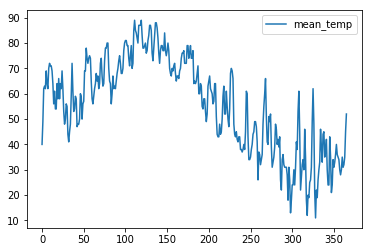

In [48]:
df.plot(y='mean_temp')

En el eje horizontal se incluye el 'indice de la serie, que en este caso es un n'umero autocorrelativo.

Vamos a sustituir el 'indice del dataframe por la columna date, de manera que ahora la fecha sea el 'indice, y por tanto se dibuje en el eje horizontal.

In [50]:
df = df.set_index('date')

Comprueba que ahora al dibujar la columna mean_temp, en el eje horizontal vemos la fecha en vez del 'indice autocorrelativo

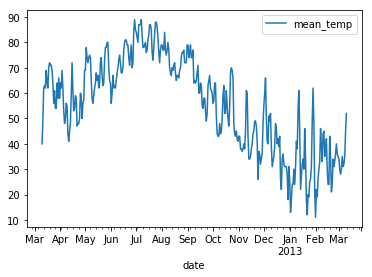

In [51]:
df.plot(y='mean_temp')

Sin embargo, ahora el dataframe tiene a la vez el índice y la columna date con los mismos valores. La columna date es redundante. **Podrías eliminarla?**

Ten cuidado, porque al eliminar una columna no actúas sobre el dataframe, sino que obtienes una copia del dataframe con la columna eliminada. No necesitamos el dataframe original, así que sobreescribe d con el nuevo dataframe sin la columna date.

Al usar plot, obtenemos un gráfico de la serie temporal de la columna mean_temp. Vamos ahora a dibujar un histograma de esta columna, usando hist en vez de plot. **Intenta entender cuál es la diferencia entre ambos gráficos. Por qué ya no aparece la fecha en el gráfico? Qué valores se muestran en cada uno de los ejes?**

**En qué situaciones es útil un histograma?**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42ddb5d978>]],
      dtype=object)

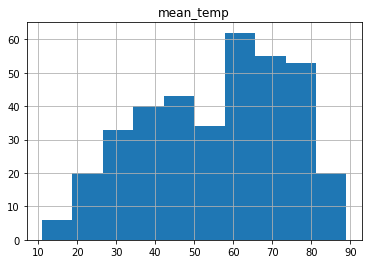

In [56]:
df.hist('mean_temp')

Los valores de la temperatura estan en grados Farenheit, unas unidades que son difíciles de interpretar para la mayoría de nosotros.

Vamos a crear una columna mean_tempC que contenga los valores de mean_temp, pero transformados a grados centígrados, más fáciles de interpretar para nosotros. Para ello haremos uso de la función definida en la siguiente celda:

In [58]:
@np.vectorize
def farentheit_to_celsius(degree):
    return (degree - 32) / 1.8

Usa la función para crear la columna adicional con los valores en grados centígrados (grados Celsius), de nombre **mean_tempC**

In [59]:
df['mean_tempC'] = farentheit_to_celsius(df['mean_temp'])

Dibuja ahora la serie temporal con esta nueva columna, usando plot. Incluye una rejilla (grid) en el gráfico para que sea más fácil de leer e interpretar

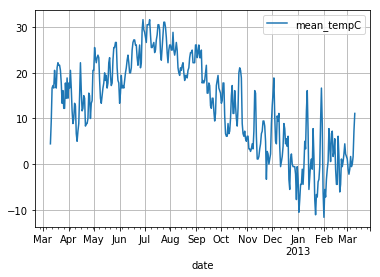

In [62]:
df.plot(y='mean_tempC', grid=True)

Dibuja ahora también un histograma de esta nueva columna. **Cuál es el rango de temperaturas más frecuente en los datos?**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42d2d4ca20>]],
      dtype=object)

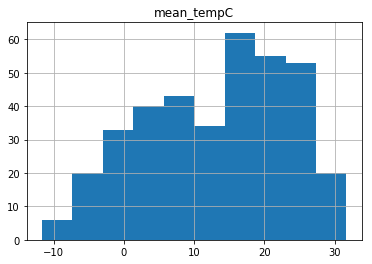

In [63]:
df.hist('mean_tempC')

Como se puede ver en ambos gráficos, hay algunos días con temperaturas bajo 0.

**En qué día ocurrió la temperatura más baja? Cuál fue la temperature media ese día?**

**Cuántos días de temperaturas bajo cero hay en los datos?**

*Solución: El 1 de febrero de 2013 con -11.67 C, 44 d'ias

In [65]:
df['mean_tempC'].idxmin()

Timestamp('2013-02-01 00:00:00')

In [66]:
df['mean_tempC'].min()

-11.666666666666666

In [73]:
df[df['mean_tempC'] < 0].shape

(44, 23)

En el dataframe tenemos también las columnas min_temp y max_temp, que están también en grados Farenheit.

Crea dos columnas nuevas min_tempC y max_tempC, que contengan las temperaturas en grados centígrados. Recuerda que tienes la función f2c disponible.

In [77]:
df['min_tempC'] = farentheit_to_celsius(df['min_temp'])
df['max_tempC'] = farentheit_to_celsius(df['max_temp'])

Dibuja las series temporales de min_tempC, mean_tempC y max_tempC en una misma gráfica con tres curvas de diferentes columnas y leyenda. Añade una rejilla (grid) al gr'afico.

*Pista*: Si tienes un dataframe con la fecha en el índice y solo esas tres columnas, puedes usar el método plot del dataframe para obtener justo ese gráfico. Intenta extraer solo las tres columnas del dataframe d

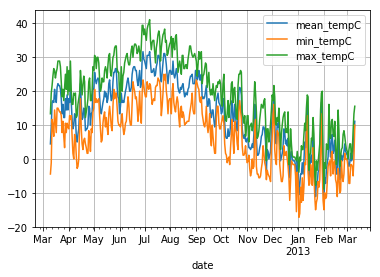

In [78]:
df[['mean_tempC', 'min_tempC', 'max_tempC']].plot(grid=True)

La columna precipitation contiene la cantidad de lluvias diarias. Pero tenemos un problema, no todos los datos son numéricos. Obtén los primeros diez valores de la columna precipitation y comprueba si existe algún valor no numérico. **Que valor no numérico has encontrado?**

*Solución*: Hay valores que contienen T

In [83]:
df['precipitation'].head(10)

date
2012-03-10    0.00
2012-03-11       T
2012-03-12    0.03
2012-03-13    0.00
2012-03-14    0.00
2012-03-15    0.04
2012-03-16       T
2012-03-17       T
2012-03-18       T
2012-03-19    0.00
Name: precipitation, dtype: object

Además, el resto de datos de la columna se han interpretado como texto. **Usa la siguiente función para crear una columna de nombre precipitationN que contendrá los valores numéricos**.

Lo que vamos a hacer es transformar en un número si encontramos un valor numérico, y en el caso de que encontremos T, el valor correspondiente será 0.00. El valor T significa que en ese día hubo trazas de lluvia. Es decir, llovió, pero muy poco, y no ha quedado registrado el volumen de precipitación.

In [88]:
@np.vectorize
def t_to_zero(precip):
    if precip == 'T':
        return 0
    else:
        return float(precip)

In [90]:
df['precipitation'] = t_to_zero(df['precipitation'])

In [91]:
df['precipitation']

date
2012-03-10    0.00
2012-03-11    0.00
2012-03-12    0.03
2012-03-13    0.00
2012-03-14    0.00
2012-03-15    0.04
2012-03-16    0.00
2012-03-17    0.00
2012-03-18    0.00
2012-03-19    0.00
2012-03-20    0.00
2012-03-21    0.00
2012-03-22    0.14
2012-03-23    0.86
2012-03-24    0.06
2012-03-25    0.00
2012-03-26    0.00
2012-03-27    0.00
2012-03-28    0.00
2012-03-29    0.00
2012-03-30    0.01
2012-03-31    0.00
2012-04-01    0.51
2012-04-02    0.01
2012-04-03    0.00
2012-04-04    0.01
2012-04-05    0.69
2012-04-06    0.00
2012-04-07    0.00
2012-04-08    0.00
              ... 
2013-02-09    0.00
2013-02-10    0.27
2013-02-11    0.00
2013-02-12    0.00
2013-02-13    0.00
2013-02-14    0.00
2013-02-15    0.00
2013-02-16    0.00
2013-02-17    0.00
2013-02-18    0.39
2013-02-19    0.10
2013-02-20    0.00
2013-02-21    0.30
2013-02-22    0.03
2013-02-23    0.00
2013-02-24    0.00
2013-02-25    0.00
2013-02-26    1.17
2013-02-27    0.05
2013-02-28    0.01
2013-03-01    0.03
2013-03

Desde este momento, vamos a trabajar solo con las siguientes columnas:
* min_tempC
* mean_tempC
* max_tempC
* precipitationN

El índice del dataframe lo vamos a conservar también, para tener las fechas para dibujar diversos gráficos.

**Crea un dataframe de nombre w que contenga solo esas columnas, pero que conserve el índice de d**

In [93]:
weather = df[['min_tempC', 'mean_tempC', 'max_tempC', 'precipitation']]

A modo de ejemplo, vemos cómo realizar una nube de puntos relacionando precipitación con la temperatura media.

Existen muchos gráficos que se pueden hacer directamente con Pandas y sus Series y Dataframes. Para más información, consulta la documentación en http://pandas.pydata.org/pandas-docs/stable/visualization.html

**Llovió algún día en los que la temperatura media era menor que 0?**

*Solución*: Sí, algunos puntos con temperaturas negativas tienen precipitaciones positivas.

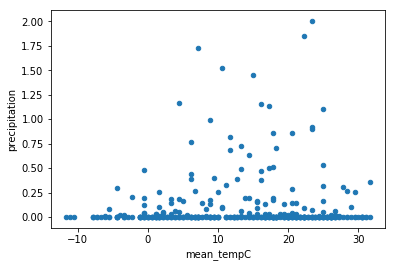

In [94]:
weather.plot(x='mean_tempC', y='precipitation', kind='scatter')